<a href="https://colab.research.google.com/github/Nagababu91768/SparkFoundation/blob/master/Predict_percentage_based_on_study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="magenta"> Author Name : U. Nagababu </font>
## <font color="green">Domain :</font> Data Science and Business Analyst
## <font color="green">Task :</font> Predict the percentage of an student based on the no.of study hours.
## <font color="green">Language :</font> Python
## <font color="green">Excepted Results : </font>Predict the percentage based on study hours (Ex: 9.25) 
## <font color="green">Algorithm :</font> Supervised Linear Regression 
## <font color="green">features :</font> single feature (hours ) 
## <font color="green">Target : </font> scores

#- <font color="brown">1.Lets start the import required libraries</font>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### <font color="purple">1.1 Read Dataset (Extension as csv the we use the read_csv in pandas)</font>

In [3]:
df=pd.read_csv('/content/sample_data/student_scores - student_scores.csv')

### <font color="purple">1.2 Information about dataset</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### <font color="purple">1.3 checking dataset have any missing values</font>

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### <font color="purple">1.4 Describe the dataset</font>

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


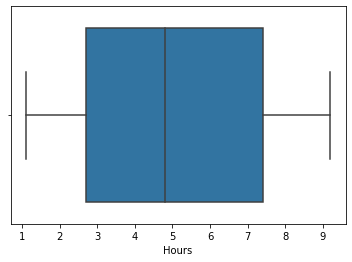

In [7]:
sns.boxplot(df["Hours"])

### <font color="purple">2.Split the data into train and test<font>

In [8]:
## two ways to split the data 
## 1 .sklearn
## 2. numpy
from sklearn.model_selection import train_test_split as model

### <font color="purple">2.1 Use all dataset observations for traing the model because of we have low volume of data</font>

In [9]:
###  find out cols 
df.columns 

Index(['Hours', 'Scores'], dtype='object')

### <font color="purple">2.2 Creates the feature and target sets as well as

In [10]:
features=df[["Hours"]]
target=df[["Scores"]]

## <font color="purple">3.3 Creates the object for LR Model </font>

In [11]:
lr=LinearRegression()
trained_model=lr.fit(features,target)

### <font color="purple">3.4 Applies prediction on the train set </font>

In [12]:
pre_seen_data=trained_model.predict(features)

In [13]:
## Lets Explore Through charts 

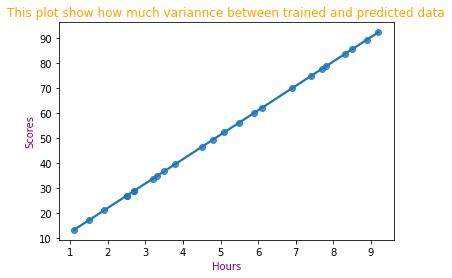

In [14]:
sns.regplot(features,pre_seen_data)
plt.title("This plot show how much variannce between trained and predicted data",fontdict={"color":"orange"})
plt.xlabel("Hours",fontdict={"color":"purple"})
plt.ylabel("Scores",fontdict={"color":"purple"})
plt.show()
plt.show()

##<font color="purple"> Lets displays the slope ans coeff of the model</font>

In [15]:
trained_model.coef_ 

array([[9.77580339]])

In [16]:
trained_model.intercept_

array([2.48367341])

## <font color="red">Predict the percentage on the 9.25 hours</font>

In [17]:
trained_model.predict([[9.25]])

array([[92.90985477]])

In [18]:
trained_model.intercept_+9.25*trained_model.coef_

array([[92.90985477]])

## <font color="magenta">Way-2 using sklearn train_test_split

In [19]:
x_train,x_test,y_train,y_test=model(features,target,random_state=100)

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
pre_train=lr.predict(x_train)

In [22]:
pre_train 

array([[49.17105214],
       [92.52952108],
       [46.2147929 ],
       [36.36059541],
       [78.7336446 ],
       [26.50639793],
       [52.12731139],
       [28.47723743],
       [12.71052145],
       [20.59387944],
       [61.98150888],
       [33.40433617],
       [77.74822485],
       [26.50639793],
       [89.57326183],
       [56.06899038],
       [85.63158284],
       [83.66074334]])

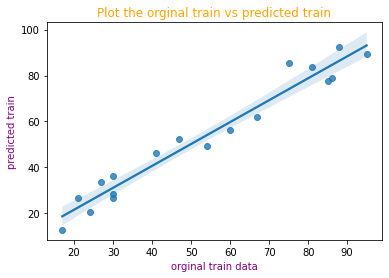

In [23]:
sns.regplot(y_train,pre_train)
plt.title("Plot the orginal train vs predicted train",fontdict={"color":"orange"})
plt.xlabel("orginal train data",fontdict={"color":"purple"})
plt.ylabel("predicted train",fontdict={"color":"purple"})
plt.show()

In [24]:
pre_test=lr.predict(x_test)

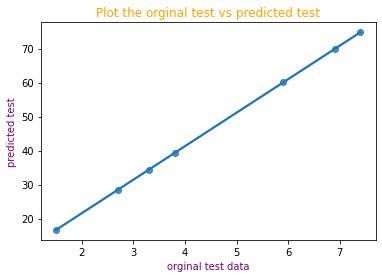

In [25]:
sns.regplot(x_test,pre_test)
plt.title("Plot the orginal test vs predicted test",fontdict={"color":"orange"})
plt.xlabel("orginal test data",fontdict={"color":"purple"})
plt.ylabel("predicted test",fontdict={"color":"purple"})
plt.show()

In [26]:
lr.coef_

array([[9.85419749]])

In [27]:
lr.intercept_

array([1.87090422])

## <font color="red">Prediction using train_test_split in sklearn </font>

In [28]:
lr.predict([[9.25]])

array([[93.02223095]])

## <font color="green">**Model** Evaluation 

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,pre_test)

24.999164520709222

In [31]:
r2_score(y_test,pre_test)

0.9403157736545141